In [50]:
import pandas as pd
import numpy as np
import re
import requests
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import seaborn as sns

In [51]:
hotels = pd.read_csv('./data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [52]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [53]:
#Удаляем дубликаты 
hotels = hotels.drop_duplicates()

<AxesSubplot: ylabel='reviewer_score'>

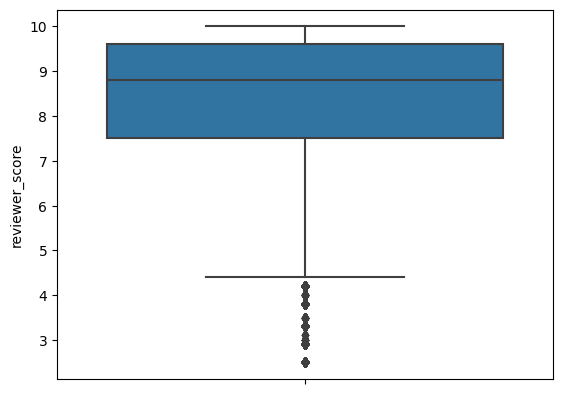

In [54]:
#Смотрим выбросы
sns.boxplot(

    y=hotels['reviewer_score']
)


In [55]:
# Finding outliers by z-method with adjustment option for boundaries.

def outliers_z_score(data, feature, left_mod=3, right_mod=3, log_scale=False):
    
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]

    mu = x.mean()

    sigma = x.std()

    lower_bound = mu - left_mod * sigma

    upper_bound = mu + right_mod * sigma

    outliers = data[(x < lower_bound) | (x > upper_bound)]

    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    print(f'Количество выбросов по z-методу: {outliers.shape[0]}')
    print(f'Результирующее количество строк в очищенном фрейме: {cleaned.shape[0]}')

    return outliers, cleaned

In [56]:
outliers, data = outliers_z_score(data=hotels, feature='reviewer_score', log_scale=True, left_mod=4.5, right_mod=5)

Количество выбросов по z-методу: 1628
Результирующее количество строк в очищенном фрейме: 384868


In [57]:
outliers.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,1628.000000,1628.000000,1628.000000,1628.00000,1628.00000,1628.000000,1628.0,1616.000000,1616.000000
mean,549.328624,7.977150,46.008600,3125.94656,8.31941,5.588452,2.5,49.533155,2.788295
std,601.932178,0.625876,66.235661,2733.82391,21.78991,10.771079,0.0,3.299935,4.319512
min,4.000000,5.200000,0.000000,66.00000,0.00000,1.000000,2.5,41.328376,-0.369758
25%,172.000000,7.500000,6.000000,1239.50000,0.00000,1.000000,2.5,48.837689,-0.160413
50%,359.500000,8.100000,22.000000,2378.00000,2.00000,2.000000,2.5,51.501910,0.059042
75%,688.000000,8.400000,57.000000,4000.00000,7.00000,5.000000,2.5,51.516556,4.844085
max,2682.000000,9.500000,401.000000,16670.00000,372.00000,211.000000,2.5,52.400181,16.421974


In [58]:
#Проработать признак давности - недавности обзора

In [59]:
#Проработать признак популярности отеля по количеству упоминаний

In [60]:
#Проработать признак существенности негатива/позитива на основании количества слов

---

Преобразование тегов

In [61]:
# Пркобразование тегов к списку
def tag_reconstr(data):
    temp_list = []
    for i in data.split("'"):
        temp_list.append(i.strip())

    temp_list.remove('[')
    temp_list.remove(']')

    for i in temp_list:
        if i == ',':
            temp_list.remove(i)
    return temp_list


tags_series = data['tags'].apply(tag_reconstr)
data['tags'] = data['tags'].apply(tag_reconstr)

#Формируем базу для one_hot, параллельно выдергиваем фит прожитых ночей
all_tags = tags_series.explode()
stayed_night_mask = all_tags.str.contains('Stayed', regex=False)
stayed_night = all_tags[stayed_night_mask]
stayed_night.str.split(' ')

def night_at_hotel(data):
    temp_var = 0
    for i in data.split(' '):
        try:
            temp_var = int(i)
        except ValueError:
            pass
    return temp_var

nights = stayed_night.apply(night_at_hotel)
nights = nights.rename('nights')
data = pd.concat([data, nights], axis=1)
data['nights'] = data['nights'].fillna(data['nights'].mode()[0])

#Вытаскиваем топ 50 тегов и разворачиваем на их основе one_hot
top_tags = all_tags.value_counts()[:51]
mask = top_tags.index.str.contains('Stayed', regex=False)
one_hot_columns = list(top_tags[~mask].index)

for element in one_hot_columns:
    data[element] = data['tags'].apply(lambda x: 1 if element in x else 0)

/var/folders/1_/hgb3xg852md0hqqs3ybwbsp40000gn/T/ipykernel_34881/1872122303.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(tag_reconstr)


Кодируем отели

In [62]:
#Кодируем названия отелей
data['hotel_name'] = data['hotel_name'].astype('category')
data['hotel_name'] = data['hotel_name'].cat.codes

Код отеля по коду его страны

In [63]:
# Достаем код страны
response = requests.get('https://countrycode.org/')
country_code = pd.read_html(response.text)
country_code = country_code[0]
country_code = country_code[['COUNTRY', 'COUNTRY CODE']]

# Создаем функцию для формирования кодовой строки исходя из принципа территориальной близости принадлежности для кодов формата Х-ХХХ
def get_code(data):
    data = data.split('-')
    return int(data[0])


country_code['COUNTRY CODE'] = country_code['COUNTRY CODE'].apply(get_code)

# Формируем новый закодированный (в последствие) признак местоположения отеля
data['hotel_country'] = data['hotel_address'].str.split(' ')
data['hotel_country'] = data['hotel_country'].apply(lambda x: x[-2::])
data['hotel_country'] = data['hotel_country'].apply(
    lambda x: x[0]+' '+x[1] if x[0] == 'United' else x[1])

data = data.merge(
    country_code, how='left',
    left_on='hotel_country', right_on='COUNTRY'
)
data = data.rename(columns={'COUNTRY CODE': 'hotel_country_code'})


Код ревьюера по его национальной принадлежности

In [64]:
# Стрипуем национальность для будущего присвоения кода страны
data['reviewer_nationality'] = data['reviewer_nationality'].str.strip()
# Переименуем пару стран
data['reviewer_nationality'] = data['reviewer_nationality'].str.replace(
    'United States of America', 'United States')

# Формируем новый фрейм с кодом страны ревьюера
data = data.merge(
    country_code, how='left',
    left_on='reviewer_nationality', right_on='COUNTRY'
)

data = data.rename(
    columns={'COUNTRY CODE': 'nationality_code', 'COUNTRY': 'reviewer_country'})

data['nationality_code'] = data['nationality_code'].fillna(
    data['nationality_code'].mode()[0])


Являетлся ли ревьюер жителем страны в которой находится отель

In [65]:
data['is_citizen'] = data['nationality_code'] == data['hotel_country_code']
data['is_citizen'] = data['is_citizen'].apply(lambda x: 1 if x == True else 0)

Вытаскиваем город для дальнейших манипуляций с растояниями до различных объектов

In [66]:
#Создаем признак города
data['city'] = data['hotel_address'].str.split(' ')
data['city'] = data['city'].apply(lambda x: x[-5] if x[-1] == 'Kingdom' else x[-2])

In [67]:
#Cоздаем список городов в сете
city_list = list(data['city'].unique())
city_list

['London', 'Paris', 'Amsterdam', 'Milan', 'Vienna', 'Barcelona']

In [68]:
# Условные центры городов выбранные на основание исторических достопримечательностей. 
# В данном случае рассматриваются центры притяжения для отдыха, но не бизнес поездок, 
# т.к. предыдущие изыскания показали превалирующую долю в датасете и признак бизнес поездок был дропнут
# в виду наличия мультиколлинеарности и меньшей доли. 

cities_coordinates = {
    'London': (51.50458, -0.1332), 'Paris': (48.85637, 2.33475),
    'Amsterdam': (52.374787, 4.896339), 'Milan': (45.470098, 9.179906),
    'Vienna': (48.207904, 16.368116), 'Barcelona': (41.399367, 2.169938)
}


Немного прервемся с расстоянием

Заполняем пропуски в широте и долготе используя адреса отелей

In [69]:
#Создаем пустые списки, в них будем нарезать куски адресов, точность будет не абсолюьная, но приемлимая
temp_list = []
list_of_nan = []
address_list = []

#Создаем список уникальных адресов отелей с пропусками
empty_loc = data[data['lat'].isnull()]
empty_hot_list = list(empty_loc['hotel_address'].unique())

#Планомерно заполняем наши списки, впоследующем address_list используем для получения кортежей lat/lng
for i in empty_hot_list:
    temp_var = i.split(' ')[-1:-4:-1]
    temp_list.append(temp_var)
    
for i in temp_list:
    list_of_nan.append(i[::-1])

for i in list_of_nan:
    address_list.append(' '.join(i))
    

#Пробегаем циклом по адресам и создаем список кортежей ключ- часть адреса, значение lat/lng
location_tuple_dict = dict()
lat_dict = dict()
lng_dict = dict()
geolocator = Nominatim(user_agent="my_request")
for loc in address_list:
    location = geolocator.geocode(loc)
    location_tuple_dict[loc]=(location.latitude, location.longitude)
    lat_dict[loc] = location.latitude
    lng_dict[loc] = location.longitude

# Востанавливаем словарь с полным названием, после всех манипуляций у нас есть словарь с ключами
# в виде полного адреса и значениями в виде кортежа координат
new_lat_dict = dict()
for i in lat_dict:
    for j in empty_hot_list:
        if i in j:
            new_lat_dict[j] = lat_dict[i]
            
new_lng_dict = dict()
for i in lng_dict:
    for j in empty_hot_list:
        if i in j:
            new_lng_dict[j] = lng_dict[i]

In [70]:
#Заполним пустоты в широте
data['lat'] = data['lat'].fillna(data['hotel_address'].apply(lambda x: new_lat_dict.get(x)))

In [71]:
#И долготе
data['lng'] = data['lng'].fillna(data['hotel_address'].apply(lambda x: new_lng_dict.get(x)))

In [72]:
#Создаем новый фит координат отеля
data['coordinates'] = tuple(zip(data['lat'], data['lng']))


Вернемся к расстояниям

In [73]:
# Функция для нахождения расстояния
data['distance_center'] = data['coordinates'].apply(
    lambda x: geodesic(x, cities_coordinates[data['city'][0]]).km)


Вытаскиваем день недели и отдельно месяц

In [74]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['month'] = data['review_date'].dt.month
data['day_of_week'] = data['review_date'].dt.day_of_week

Количество дней с момента отзыва как int

In [75]:
# Достаем количество дней c момента публикации ревью
def days_num(string_):
    regexp = re.findall(r'\d{0,5}', string_)
    return regexp[0]


data['days_since_review'] = data['days_since_review'].apply(days_num)
data['days_since_review'] = data['days_since_review'].astype('int')


Проверяем на мультиколлинеарность

/var/folders/1_/hgb3xg852md0hqqs3ybwbsp40000gn/T/ipykernel_34881/1607366581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  whole_corr = data.corr()[(data.corr() > 0.7) | (data.corr() < -0.7)]


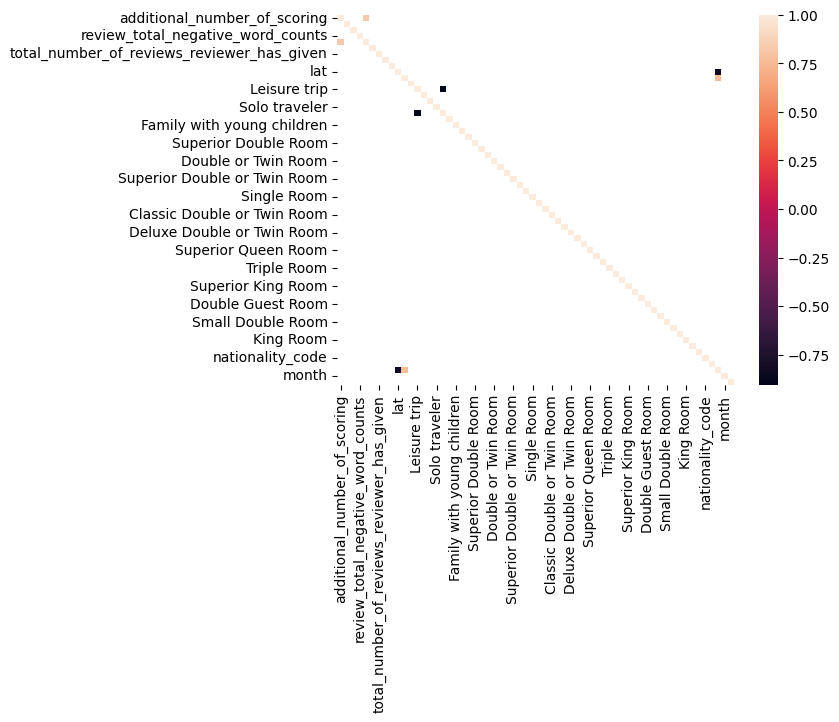

In [76]:
whole_corr = data.corr()[(data.corr() > 0.7) | (data.corr() < -0.7)]
sns.heatmap(whole_corr);

In [77]:
#Список фитов с мультиколлинеарностью
direct_corr = whole_corr.count(axis=0)
corr_columns = pd.DataFrame({'Name':direct_corr.index, 'CNT':direct_corr.values})
corr_columns.query("CNT > 1")

,Name,CNT
0,additional_number_of_scoring,2
4,total_number_of_reviews,2
9,lat,2
10,lng,2
12,Leisure trip,2
16,Business trip,2
59,distance_center,3


In [78]:
data.drop(['additional_number_of_scoring', 'Business trip', 'lat', 'lng'], axis=1, inplace=True)
#Дропаем столбец даты что бы модель могла работать
data.drop(['review_date'], axis=1, inplace=True)

---

In [79]:
#Дропаем строковые фиты
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [80]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score'] 

In [81]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [82]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)


In [84]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12883481546749426


MAPE: 0.1348907393516852